In [55]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
#To Bring Data from folders into code

def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    for symbol in symbols:
      
        df_temp=pd.read_csv("./data/{}.csv".format(symbol),index_col="Date", parse_dates=True, usecols=["Date","Adj Close"],na_values=["nan"])
        df_temp=df_temp.rename(columns={'Adj Close':symbol})
        df=df.join(df_temp)
        if(symbol=="SPY"):
            df.dropna(subset=["SPY"])
    return df


In [57]:
dates = pd.date_range('2010-01-01', '2010-12-31')
#File Names
symbols = ['SPY','GOOG', 'IBM', 'GLD']

df=get_data(symbols, dates)
#Droping NaN
df=df.dropna(subset=["SPY"])

In [58]:
#Slicing Between Rows And Columns
df.loc['2010-01-01':'2010-01-31',['IBM','SPY']]

,IBM,SPY
2010-01-04,98.142967,93.244675
2010-01-05,96.957375,93.491486
2010-01-06,96.327530,93.557304
2010-01-07,95.994110,93.952278
2010-01-08,96.957375,94.264915
2010-01-11,95.942223,94.396545
2010-01-12,96.705429,93.516182
2010-01-13,96.497971,94.306030
2010-01-14,98.039223,94.561073
2010-01-15,97.646492,93.499710


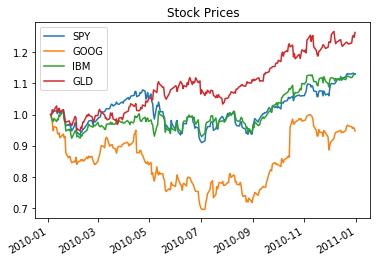

In [73]:
#To start all the data from one single point so that we can compare easily
df=df/df.iloc[0,:]
ax=df.plot(title="Stock Prices")
plt.show()
